In [8]:
import matplotlib.pyplot as plt
import numpy as np

tickers = ['AAPL','JPM','F','PG', 'BA']

investment_period = 1 # each 1 investment days 
reward_period = 15 # each 15 investment periods

def evaluate_model(model,env):
    done = False
    rewards = []
    portfolio_worths = []
    obs = env.reset()
    portfolio_worths.append(1.0)
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done,info = env.step(action)
        portfolio_worths.append(info[0]['porfolio_worth'])
        rewards.append(reward)
    return np.array(rewards),np.array(portfolio_worths)

d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\env_checker.py:453: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


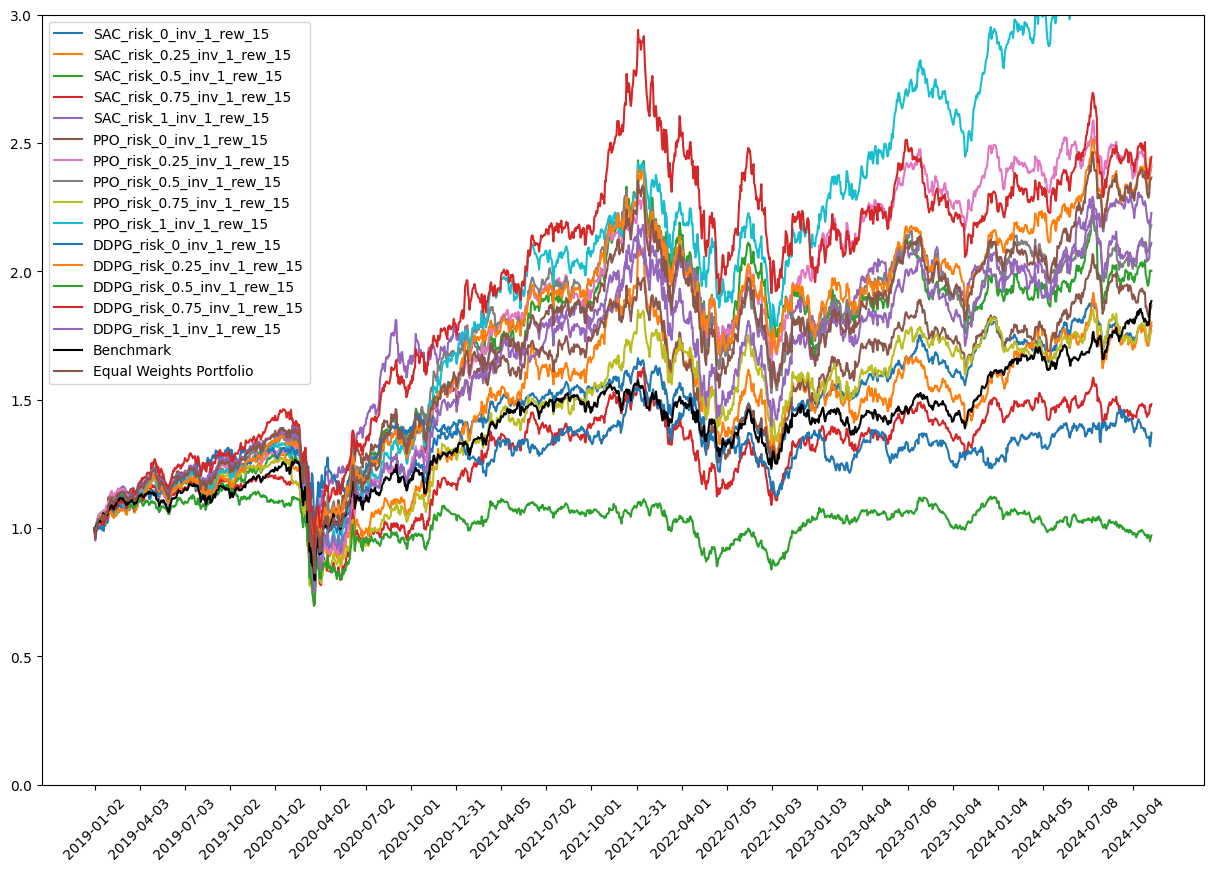

In [11]:
from stable_baselines3 import PPO,SAC,DDPG
from enviroment import create_env

eval_env,eval_dates,eval_benchmark,prices = create_env(tickers,'2019-01-01','2024-12-31',investment_period,reward_period,risk_aversion=0.5)

# read models from files at './models'
models = [
    'SAC_risk_0_inv_1_rew_15',
    'SAC_risk_0.25_inv_1_rew_15',
    'SAC_risk_0.5_inv_1_rew_15',
    'SAC_risk_0.75_inv_1_rew_15',
    'SAC_risk_1_inv_1_rew_15',
    'PPO_risk_0_inv_1_rew_15',
    'PPO_risk_0.25_inv_1_rew_15',
    'PPO_risk_0.5_inv_1_rew_15',
    'PPO_risk_0.75_inv_1_rew_15',
    'PPO_risk_1_inv_1_rew_15',
    'DDPG_risk_0_inv_1_rew_15',
    'DDPG_risk_0.25_inv_1_rew_15',
    'DDPG_risk_0.5_inv_1_rew_15',
    'DDPG_risk_0.75_inv_1_rew_15',
    'DDPG_risk_1_inv_1_rew_15'
]

plt.figure(figsize=(15,10))
for idx,model_name in enumerate(models):
    model_path = f'././models/{model_name}.zip'
    if 'SAC' in model_name:
        model = SAC.load(model_path)
    elif 'PPO' in model_name:
        model = PPO.load(model_path)
    elif 'DDPG' in model_name:
        model = DDPG.load(model_path)
    rewards,portfolio_worths = evaluate_model(model,eval_env)
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}')

eval_benchmark_relative = eval_benchmark/eval_benchmark[0]
plt.plot(eval_dates,eval_benchmark_relative,linestyle='-',label='Benchmark', color='black')

relative_prices = [timeline/timeline[0] for timeline in prices]
equal_weights_portfolio_worths = np.mean(relative_prices,axis=0)

plt.plot(eval_dates,equal_weights_portfolio_worths,linestyle='-',label='Equal Weights Portfolio')

plt.xticks(eval_dates[::63],rotation=45)
plt.ylim(0,3)
plt.legend()